## Question 8.8 with Adaptive Step Size
The original question was as follows:
Exercise 8.8 from Newman asks us to consider "space garbage", a sphere moving around a rod and solve for the trajectory of this sphere in (x,y) plane. We will do it via converting the $2^{nd}$ order ODEs(given in Part A of the exercise) into first order ODEs in order to solve them. The equations of emotion given are: 
\begin{equation}
\frac { \mathrm { d } ^ { 2 } x } { \mathrm { d } t ^ { 2 } } = - G M \frac { x } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation}
and 
\begin{equation}
\frac { \mathrm { d } ^ { 2 } y } { \mathrm { d } t ^ { 2 } } = - G M \frac { y } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation}
in terms of acceleration. 


##### Reducing Order of Differential Equations from 8.3 
The method describes defining a new quantity as the derivivative and then writing the function in terms of that. Therefore, our functions can now be written in terms of the velocity.
\begin{equation}
\frac { \mathrm { d }  V_x } { \mathrm { d } t  } = - G M \frac { x } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation}
and 
\begin{equation}
\frac { \mathrm { d } V_y } { \mathrm { d } t  } = - G M \frac { y } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation} 

#### Adaptive Step Size
The question now asks us to implement adaptive step size. This is as follows,
We calculate 
\begin{equation}
\rho = \frac { h \delta } { \sqrt { \epsilon _ { x } ^ { 2 } + \epsilon _ { y } ^ { 2 } } }
\end{equation}
where the deniminator is the error of euclidean distance,
\begin{equation}
\epsilon_x = \frac{1}{30}(x_1 - x_2 ) \qquad \epsilon_y = \frac{1}{30}(y_1 - y_2 ) 
\end{equation}
and then use $ \rho $ to calculate the next step, 
\begin{equation}
h' = h \rho ^{\frac{1}{4}}
\end{equation}



In [4]:
### Original Code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

In [6]:
#Defining Constants
f_G = 1.0       # gravitaional constant
f_M = 10.0      # mass
f_L = 2.0       # length of rod
#Defining Initial Conditions
f_x_init = 1.0  # x position
f_y_init = 0.0  # y position
t_naught = 0.0  # time inital
t_final = 10.0  # time final
v_x_init = 0.0  # x velocity 
v_y_init = 1.0  # y velocity
N = 10000        # number of steps
h = (t_final - t_naught)/N                         # step size
tpoints = np.arange(t_naught,t_final,h)            # empty time array
r = np.array([f_x_init,f_y_init,v_x_init,v_y_init],float)    # initial conditions
solution = np.empty(tpoints.shape + r.shape,float) # 

In [7]:
# Newman's ODEsim algorithim using RK4
def Function(a_r,t):
    '''
    This function is the combination of the four 
    single order ODE's explained above
    Input:
    a_r: An array of the four variables , x, y, x velocity, and y velocity
    t  : Time as the independent variable
    Output: 
    The derivatives of the four variables:
    x velocity, y velocity, x acceleration, y accelration
    '''
    
    x,y,v_x, v_y = a_r  # unpacking variables
    # Redefined derivatives
    x_velocity = v_x   # self explanatory 
    y_velocity = v_y   # self explanatory
    
    R = np.sqrt(x**2+y**2)  # the displacement vector
    a_coefficents = - f_G*f_M/R/np.sqrt(R**2 + f_L**2/4.)
    # above equation is the coefficents of
    # acceleration equation from Newman
    x_acceleration = a_coefficents * x/R  # self explanatory 
    y_acceleration = a_coefficents * y/R  # self explanatory
    return np.array([x_velocity,y_velocity,x_acceleration,y_acceleration])




In [8]:
# Newman's Simulatenous ODE Solver
# Using 4th Order Runge-Kutta Method
def RK4Algorithim(tpoints, h,r, Function):
    for i,t in enumerate(tpoints):
        solution[i]=r
        k1 = h*Function(r,t)
        k2 = h*Function(r+0.5*k1,t+0.5*h)
        k3 = h*Function(r+0.5*k2,t+0.5*h)
        k4 = h*Function(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return(solution)

In [9]:
def RK4(t, h, r, Function):
    #print(t, h, r, Function, 'input')
    k1 = h*Function(r,t)
    k2 = h*Function(r+0.5*k1,t+0.5*h)
    k3 = h*Function(r+0.5*k2,t+0.5*h)
    k4 = h*Function(r+k3,t+h)
    r_output =  r+ (k1+2*k2+2*k3+k4)/6
    #print(r_output, 'output')
    return r_output

#### Now Adaptive Step Size

In [10]:
f_G = 1.0       # gravitaional constant
f_M = 10.0      # mass
f_L = 2.0       # length of rod
#Defining Initial Conditions
f_x_init = 1.0  # x position
f_y_init = 0.0  # y position
v_x_init = 0.0  # x velocity 
v_y_init = 1.0  # y velocity
N = 10000       # number of steps
t_naught = 0.0  # time inital
t_final = 10.0  # time final
h_init = (t_final - t_naught)/N                         # step size
tpoints_adap = np.zeros(1000)     # empty time array
r_init = np.array([f_x_init,f_y_init,v_x_init,v_y_init],float)    # initial conditions
adap_solution = np.empty(tpoints_adap.shape + r_init.shape,float) # 

In [11]:
fixed_start = time.time() 
fixed_solution = RK4Algorithim(tpoints, h, r,Function)
fixed_end = time.time()    
fixed_time = fixed_end - fixed_start

In [12]:
t = t_naught
delta = 10**(-6)
r_adap = r_init
adap_solution[0] = r_init
r_1 = r_init
h_adap = h_init
r_2 = r_init
ro = 1.0
i = 0
adap_begin = time.time()
while t < t_final:
   # print(t, h_adap, adap_solution[i])
   
    h_adap = h_adap * ro**(1/4) 
    r_1 = RK4(t, h_adap,adap_solution[i], Function)
    r_1 = RK4(t+h_adap, h_adap,r_1, Function)
    r_2 = RK4(t, 2*h_adap,adap_solution[i], Function)
    error = (r_1 - r_2)/30
    denominator = np.sqrt(error[0]**2 + error[1]**2)
    if denominator != 0.:
        ro = delta*h_adap/denominator
    if ro > 0.99:
        tpoints_adap[i] = t
        i += 1
        t += 2*h_adap
        if ro > 2.0:
            ro = 2.0
        adap_solution[i] = r_1
adap_end = time.time()
                

In [13]:
adap_time = adap_end - adap_begin

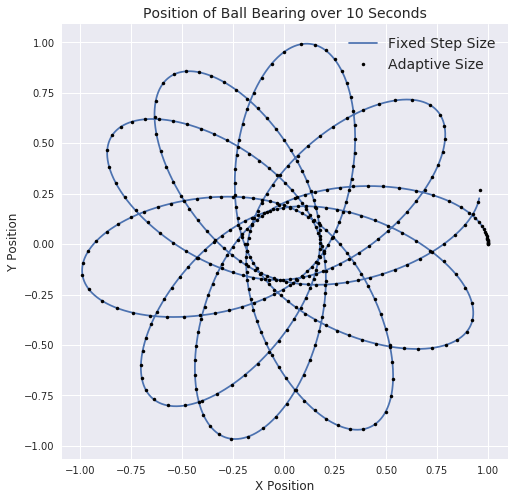

In [18]:
plt.figure(figsize = (8,8))
plt.plot(fixed_solution[:,0],fixed_solution[:,1],  label = "Fixed Step Size")
plt.plot(adap_solution[:438:1,0],adap_solution[:438:1,1], 'k.', label = "Adaptive Size")
plt.title('Position of Ball Bearing over 10 Seconds',\
          fontsize = 14)
plt.ylabel('Y Position',fontsize = 12)
plt.xlabel('X Position',fontsize = 12)
plt.legend(fontsize = '14')
plt.show()

In [27]:
print('Time for Fixed Step Size is ', fixed_time)
print('Time for Adaptive Step Size is ',adap_time)

Time for Fixed Step Size is  0.6609196662902832
Time for Adaptive Step Size is  0.15273165702819824


### Reflection for Part B 
Here I am comparing that the varying the step size has a huge decrease in the amount of time it takes to solve the same problem. 

Text(0.5,0,'Time (s)')

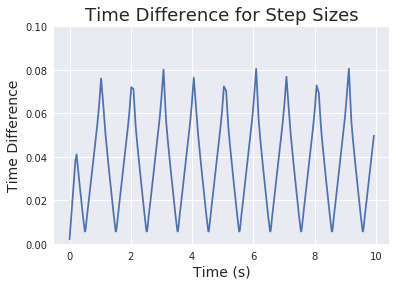

In [25]:
tpoints = tpoints_adap[0:438]
dtpoints = np.array(tpoints[1:]) - np.array(tpoints[:-1])
plt.plot(tpoints[:-2], dtpoints[:-1]) # drop the last point in tpoints
plt.ylim(0,.1)
plt.title("Time Difference for Step Sizes", fontsize = '18')
plt.ylabel('Time Difference', fontsize = '14')
plt.xlabel('Time (s)', fontsize = '14')


### Remarks for Part C
This relationship for the time difference makes intuitive sense. There is a periodic condition where the space garbage reaches near the origin and the curve is much steeper. In order to insure the accuracy of the trajectory, we require very small time steps. When the garbage is far away it can step much larger areas and insure accuracy. 